In [43]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# logistic regression, simultaneous, fraction = 0.10
backtest_odds = pd.read_csv("../../data/backtesting/backtest_odds.csv")
backtest_actual = pd.read_csv("../../model_files/lr/backtest_actual_simultaneous_0.1.csv")
backtest_mc = pd.read_csv("../../model_files/lr/backtest_mc_simultaneous_0.1.csv")

backtest_odds

,bout_id,event_id,date,sportsbook,red_odds,blue_odds,red_win
0,c1356395d6b055d7,46effbd1135423c5,2017-01-15,Bovada,-110,-120,0.0
1,ae803440d778a12b,46effbd1135423c5,2017-01-15,Bovada,190,-240,0.0
2,3f7684492c9df05e,46effbd1135423c5,2017-01-15,Bovada,-160,130,1.0
3,53c3565ee1d3411a,46effbd1135423c5,2017-01-15,Bovada,145,-175,0.0
4,8156479490877d08,46effbd1135423c5,2017-01-15,Bovada,-170,140,1.0
...,...,...,...,...,...,...,...
3955,5238f6470d0557fb,72c9c2eadfc3277e,2024-12-14,Bovada,215,-260,0.0
3956,7b1bc4ff776f12c1,72c9c2eadfc3277e,2024-12-14,Bovada,-320,265,0.0
3957,1a635a5e4551e7d5,72c9c2eadfc3277e,2024-12-14,Bovada,-420,320,1.0
3958,7521015554088962,72c9c2eadfc3277e,2024-12-14,Bovada,175,-205,1.0


In [45]:
backtest_actual

,event_id,bankroll,cumulative_bets,cumulative_wagered,cumulative_return
0,46effbd1135423c5,992.98,4,13.59,6.57
1,4512e46543b960ad,951.78,8,54.79,6.57
2,6a8a06b542e1516d,930.38,12,85.79,16.17
3,865aa315ea62c511,894.00,16,122.17,16.17
4,b4ad3a06ee4d660c,886.10,18,130.07,16.17
...,...,...,...,...,...
326,585f9ffdb0cd0466,3482.95,1160,29200.56,31683.51
327,daff32bc96d1eabf,3652.26,1166,29346.86,31999.12
328,e955046551f8c7dd,3476.99,1174,29642.29,32119.28
329,ad23903ef3af7406,3476.99,1174,29642.29,32119.28


Text(0.9, 0.8, 'p-value: 0.000700')

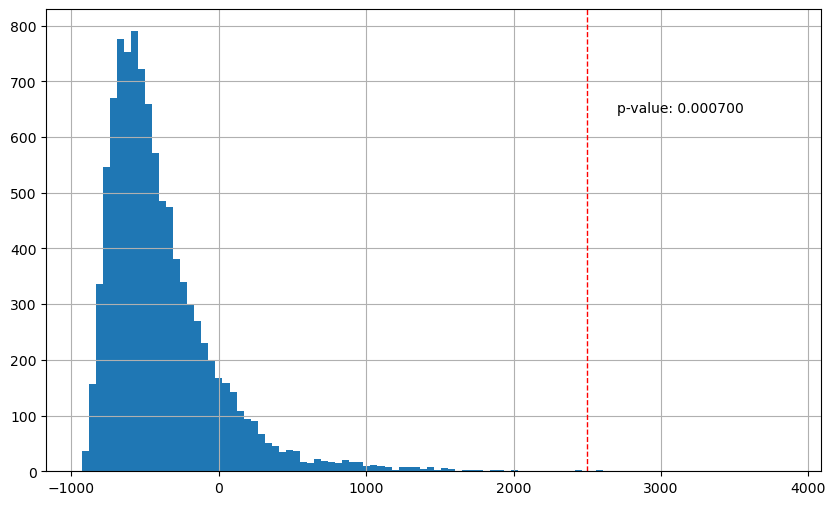

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed
simulated_pnl = backtest_mc.drop(columns=["event_id"]).iloc[-1] - 1000
simulated_pnl.hist(bins=100, ax=ax)

actual_pnl = backtest_actual["bankroll"].iloc[-1] - 1000
ax.axvline(actual_pnl, color='red', linestyle='dashed', linewidth=1)

p_value = (np.count_nonzero(simulated_pnl >= actual_pnl) + 1) / (len(simulated_pnl) + 1)
ax.text(0.9, 0.8, f'p-value: {p_value:.6f}', transform=ax.transAxes, verticalalignment='top', horizontalalignment='right')